In [26]:
pip install pandas geopandas matplotlib shapely


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\jiang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
# Import libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [74]:
# Read CSV file
csv_file = 'restaurants_suggested_by_travel_magazine.csv'  
df = pd.read_csv(csv_file)

In [75]:
# Check the columns of the GeoDataFrame
print(events_gdf.columns)

Index(['lon', 'lat', 'geometry'], dtype='object')


In [76]:
# Create GeoDataFrame from the CSV file
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
events_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [77]:
# Check the unique values in the longitude and latitude columns
print(events_gdf['lon'].value_counts())
print(events_gdf['lat'].value_counts())

lon
-73.959118    1
-73.959075    1
-73.959110    1
-73.959084    1
-73.959044    1
-73.959094    1
Name: count, dtype: int64
lat
40.783301    1
40.783352    1
40.783355    1
40.783380    1
40.783370    1
40.783337    1
Name: count, dtype: int64


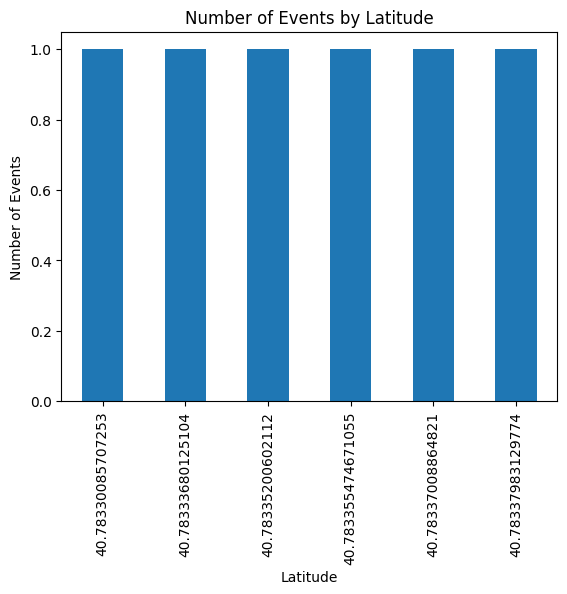

In [78]:
# Plot bar chart of event counts by latitude
events_gdf.groupby("lat").size().sort_values(ascending=False).plot.bar()
plt.xlabel('Latitude')
plt.ylabel('Number of Events')
plt.title('Number of Events by Latitude')
plt.show()

In [48]:
#geo_df.columns

In [41]:
#geo_df.lon.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'lon'

In [32]:
#geo_df.lat.value_counts()

Latitude
40.750423    932
40.679981    697
40.733729    526
40.650466    524
40.756568    501
            ... 
40.575526      1
40.760429      1
40.717077      1
40.748196      1
40.731658      1
Name: count, Length: 53500, dtype: int64

<Axes: xlabel='BORO_NM'>

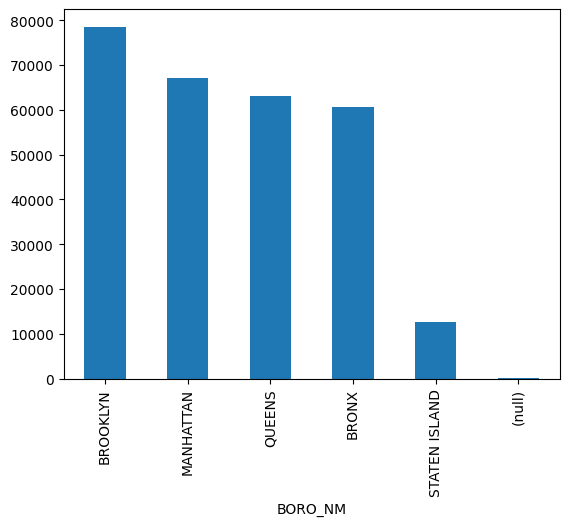

In [10]:
#geo_df.groupby("BORO_NM").size().sort_values(ascending=False).plot.bar()

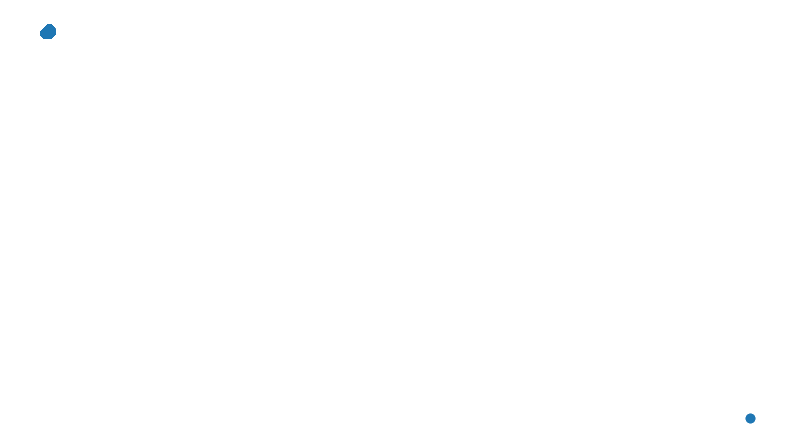

In [13]:
geo_df.plot(figsize=(10, 10)).set_axis_off()


In [34]:
#geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
#events_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [79]:
# Read GeoJSON files
area1 = gpd.read_file('route_option_1.geojson')
area2 = gpd.read_file('route_option_2.geojson')
area3 = gpd.read_file('route_option_3.geojson')

In [80]:
# Ensure CRS match
area1 = area1.to_crs(events_gdf.crs)
area2 = area2.to_crs(events_gdf.crs)
area3 = area3.to_crs(events_gdf.crs)

In [81]:
# Spatial join to find events within each area
events_in_area1 = gpd.sjoin(events_gdf, area1, how='inner', op='within')
events_in_area2 = gpd.sjoin(events_gdf, area2, how='inner', op='within')
events_in_area3 = gpd.sjoin(events_gdf, area3, how='inner', op='within')

C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\jiang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Ple

In [82]:
# Count the number of events in each area
count_area1 = events_in_area1.shape[0]
count_area2 = events_in_area2.shape[0]
count_area3 = events_in_area3.shape[0]

In [83]:
# Print the counts
print(f"Number of events in Area 1: {count_area1}")
print(f"Number of events in Area 2: {count_area2}")
print(f"Number of events in Area 3: {count_area3}")

Number of events in Area 1: 0
Number of events in Area 2: 0
Number of events in Area 3: 0


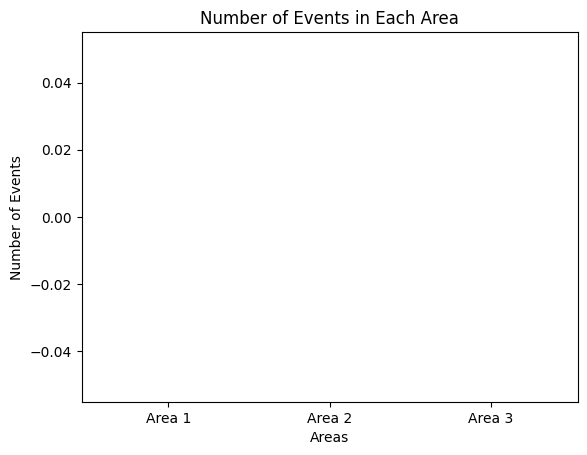

In [84]:
# Plot bar chart of event counts in each area
counts = [count_area1, count_area2, count_area3]
areas = ['Area 1', 'Area 2', 'Area 3']

plt.bar(areas, counts, color='blue')
plt.xlabel('Areas')
plt.ylabel('Number of Events')
plt.title('Number of Events in Each Area')
plt.show()